# day 5

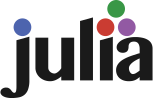

"Julia v1.5.2."

In [1]:
download("https://nextjournal.com/data/QmUCNnw1PVdYnj6eNQdRs6nwkM9V75RKxADqCoUH7WFUUr?filename=Julia_Programming_Language_Logo.svg&content-type=image/svg%2Bxml", "/results/logo.svg")
"Julia v$VERSION."

In [1]:
example = """seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4
"""

"seeds: 79 14 55 13\n\nseed-to-soil map:\n50 98 2\n52 50 48\n\nsoil-to-fertilizer map:\n0 15 37\n37 52 2\n39 0 15\n\nfertilizer-to-water map:\n49 53 8\n0 11 42\n42 0 7\n57 7 4\n\nwater-to-light map:\n88 18 7\n18 25 70\n\nlight-to-temperature map:\n45 77 23\n81 45 19\n68 64 13\n\ntemperature-to-humidity map:\n0 69 1\n1 0 69\n\nhumidity-to-location map:\n60 56 37\n56 93 4\n"

In [1]:
function toMap(lines, index)
  i = index
  theMap = []
  if '-' in lines[index]
    i += 1    
    while (length(lines[i]) > 0)
      theMap = push!(theMap, map(x -> parse(Int,x),split(lines[i], " ")))
      i += 1
    end
  end
  # println(length(theMap))
  (theMap, i)
end

toMap

In [1]:
function toSeedsRange(seeds, range)
  if length(seeds) > 0
    toSeedsRange(seeds[3:end], push!(range, [seeds[1], seeds[1]+seeds[2]-1]))
  else
    range
  end
end

toSeedsRange

In [1]:
function intersection(range1, range2)
  if (range2[1] > range1[2] || range1[1] > range2[2])
    ([], [range1])
  else
    inter = [max(range1[1], range2[1]), min(range1[2], range2[2])]
    diff = []
    if range1[1] != inter[1]
      push!(diff, [range1[1],inter[1]-1])
    end
    if range1[2] != inter[2]
      push!(diff, [inter[2]+1,range1[2]])
    end
    (inter, diff)
  end
end

intersection

In [1]:
function tryit(seedsRange, toSoil)
  sranges = seedsRange
  mappedRanges = []
  for r in toSoil
    newRanges = []
    for r1 in sranges
      inter, nr = intersection(r1, [r[2], r[2]+r[3]-1])
      if length(nr) > 0
        append!(newRanges, nr)
      end
      if length(inter) > 0
        thediff = r[2] - r[1]
        push!(mappedRanges, [inter[1]-thediff, inter[2]-thediff])
      end
    end
    # println(r, mappedRanges, newRanges)
    sranges = newRanges
  end
  append!(mappedRanges, sranges)
  #println(mappedRanges)
  mappedRanges
end

tryit

In [1]:
input = example
function solution2(input)
  lines = split(input, "\n")
  seeds = map(x -> parse(Int,x),split(lines[1][8:end], " "))
  seedsRange = toSeedsRange(seeds, [])
  toSoil,i = toMap(lines, 3)  
  toFertilizer,i = toMap(lines, i+1)
  toWater,i = toMap(lines, i+1)
  toLight,i = toMap(lines, i+1)  
  toTemparature,i = toMap(lines, i+1)
  toHumidity,i = toMap(lines, i+1)  
  toLocation,i = toMap(lines, i+1)
  #resolve ranges
  println(seedsRange)
  soil = tryit(seedsRange, toSoil)
  println(soil)
  ferti = tryit(soil, toFertilizer)
  println(ferti)
  water = tryit(ferti, toWater)
  println(water)
  light = tryit(water, toLight)
  println(light)
  temperature = tryit(light, toTemparature)
  println(temperature)
  humidity = tryit(temperature, toHumidity)
  println(humidity)
  location = tryit(humidity, toLocation)
  println(location)
  minimum(collect(Iterators.flatten(location)))
end

solution2

In [1]:
solution2(puzzleInput)


79874951

In [1]:
puzzleInput = """seeds: 2637529854 223394899 3007537707 503983167 307349251 197383535 3543757609 276648400 2296792159 141010855 116452725 5160533 2246652813 49767336 762696372 160455077 3960442213 105867001 1197133308 38546766

seed-to-soil map:
1024364543 1121869540 764570177
1788934720 0 30748436
710359306 576061773 314005237
1819683156 509305212 66756561
478556776 890067010 231802530
0 30748436 478556776

soil-to-fertilizer map:
3998185854 3762642503 103735883
2968507762 2068943953 132922295
1615660383 3128249668 130118355
730037950 2201866248 85080413
30504699 101283437 22743985
1963198232 3098529992 29719676
2445396241 816829001 206574911
4101921737 3258368023 13795434
1745778738 3272163457 98082636
184429295 124027422 42778761
815118363 1688321922 16510291
227208056 0 101283437
3101430057 730037950 86791051
2855369613 1073802717 8286129
2726882317 4266444706 28522590
2755404907 1647814534 40507388
1992917908 4002766747 184714231
0 307861200 20630293
3437715786 2286946661 488868406
2212191740 2910044568 188485424
1875478802 3756833622 5808881
1386084226 4200760960 31124145
4115717171 1704832213 179250125
2177632139 4231885105 34559601
968017015 3370246093 57414778
1957518504 1068122989 5679728
20630293 205631872 9874406
1248075951 2775815067 134229501
1417208371 1449362522 198452012
145603606 166806183 38825689
3926584192 1318303542 71601662
2651971152 3650305029 74911165
2863655742 1884082338 104852020
2400677164 1023403912 44719077
1025431793 3427660871 222644158
53248684 215506278 92354922
2795912295 1389905204 59457318
831628654 3866378386 136388361
1382305452 2065165179 3778774
1843861374 3725216194 31617428
3188221108 1082088846 236214696
1881287683 1988934358 76230821
3424435804 4187480978 13279982

fertilizer-to-water map:
52426778 0 42548209
2317094055 2628693938 80884528
4273469923 2317094055 21497373
3504443816 3801741356 19441920
1168510873 722677906 36277136
766143928 2147127897 113763545
2859981871 4203009036 91958260
3742911607 2903448576 530558316
2533492330 3494200839 307540517
1048443265 602610298 120067608
1606177181 2049845518 37728052
0 2087573570 24184027
2228508217 539688172 62922126
3523885736 4014822611 112866625
3636752361 3821183276 106159246
2204777013 515956968 23731204
163272748 80266080 177461896
340734644 1624436234 425409284
1568459310 42548209 37717871
3039420220 2338591428 290102510
1336392351 257727976 5651080
2397978583 3434006892 60193947
2951940131 3927342522 87480089
94974987 341413667 68297761
1750150773 263379056 78034611
1932038162 1351697383 272738851
1828185384 897499179 73313877
1563080665 758955042 5378645
1643905233 409711428 106245540
3329522730 2799034919 104413657
1901499261 2260891442 30538901
879907473 764333687 133165492
1342043431 1130660149 221037234
2458172530 4127689236 75319800
2841032847 2709578466 18949024
24184027 1102417398 28242751
1204788009 970813056 131604342
1013072965 2111757597 35370300
3433936387 2728527490 70507429

water-to-light map:
71899121 201997255 39056119
1870747295 791060221 18793056
1109877678 2647277659 20201672
496126127 1366401345 54786206
2289070096 3946384506 79288366
2872432379 3633289978 245210479
2566896529 1931266150 305535850
2094153218 1065408320 14844701
1747071839 1759996387 105111897
3528644588 1080253021 193678883
675287597 4169571318 125395978
1852183736 3256553708 6224195
611190115 1486911572 64097482
1972384294 809853277 55611058
4292231732 3217343431 613168
1498491937 2667479331 11999801
1356554237 502551806 141937700
110955240 241053374 38164682
800683575 2316420571 309194103
2368358462 2236802000 62837191
2523665094 3878500457 34541659
3488154933 3913042116 10582322
567693713 1443415170 43496402
2558206753 3247863932 8689776
4065356099 2990467798 226875633
3992305706 2625614674 21662985
4013968691 739672813 51387408
1330023335 1421187551 22227619
550912333 2299639191 16781380
1352250954 496126127 4303283
2027995352 1865108284 66157866
1889540351 644489506 82843943
3117642858 3262777903 370512075
3498737255 3217956599 29907333
2431195653 1273931904 92469441
1858407931 727333449 12339364
0 130098134 71899121
2170307311 2679479132 41006431
2211313742 4025672872 54996286
4292844900 500429410 2122396
149119922 0 130098134
1719479071 4141978550 27592768
3722323471 2720485563 269982235
2266310028 3923624438 22760068
2108997919 4080669158 61309392
1510491738 1551009054 208987333
1130079350 865464335 199943985

light-to-temperature map:
2246981140 2123929713 26608756
506825382 1211085022 100001399
2273589896 3259651351 49795378
606826781 48305627 403771586
2441004040 1311086421 255128583
2696132623 887597567 323487455
3131241320 452077213 69964335
1483012724 2119418493 4511220
4100438569 4209824659 85142637
2046786877 3309446729 95808859
1487523944 2344091207 205790126
3125128781 522041548 6112539
74735386 1566215004 432089996
2323385274 2937379483 117618766
46634343 2549881333 28101043
1215251469 1998305000 118258255
3201205655 0 1671284
3202876939 2150538469 193552738
1010598367 3054998249 204653102
3019620078 2577982376 105508703
2142595736 2832994079 104385404
1333509724 2683491079 149503000
4185581206 4100438569 109386090
1693314070 534124760 353472807
3396429677 528154087 5970673
0 1671284 46634343
3402400350 2116563255 2855238

temperature-to-humidity map:
3585785215 3115915735 709182081
1595400550 915086594 131894638
3115915735 3825097816 469869480
257043810 1628903919 98391269
355435079 1106926810 521977109
877412188 0 717988362
59945578 717988362 197098232
0 1046981232 59945578

humidity-to-location map:
2826523858 2649651094 205250361
2028276378 1553868404 798247480
225543770 4100328990 5722049
595208874 2352115884 297535210
3031774219 2854901455 205611797
1267642800 3435411968 22064409
138173954 4119345931 87369816
231265819 49632084 363943055
1877617809 1403209835 150658569
0 413575139 138173954
3237386016 3457476377 642852613
892744084 3060513252 374898716
3893533521 551749093 313182226
1339339293 864931319 538278516
1289707209 0 49632084
3880238629 4106051039 13294892
"""

"seeds: 2637529854 223394899 3007537707 503983167 307349251 197383535 3543757609 276648400 2296792159 141010855 116452725 5160533 2246652813 49767336 762696372 160455077 3960442213 105867001 1197133308 38546766\n\nseed-to-soil map:\n1024364543 1121869540 764570177\n1788934720 0 30748436\n710359306 576061773 314005237\n1819683156 509305212 66756561\n478556776 890067010 231802530\n0 30748436 478556776\n\nsoil-to-fertilizer map:\n3998185854 3762642503 103735883\n2968507762 2068943953 132922295\n1615660383 3128249668 130118355\n730037950 2201866248 85080413\n30504699 101283437 22743985\n1963198232 3098529992 29719676\n2445396241 816829001 206574911\n4101921737 3258368023 13795434\n1745778738 3272163457 98082636\n184429295 124027422 42778761\n815118363 1688321922 16510291\n227208056 0 101283437\n3101430057 730037950 86791051\n2855369613 1073802717 8286129\n2726882317 4266444706 28522590\n2755404907 1647814534 40507388\n1992917908 4002766747 184714231\n0 307861200 20630293\n3437715786 228694